X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]
 [5.2]
 [5.6]
 [5.9]]
y:
 [0 0 0 1 1 1 2 2 2]


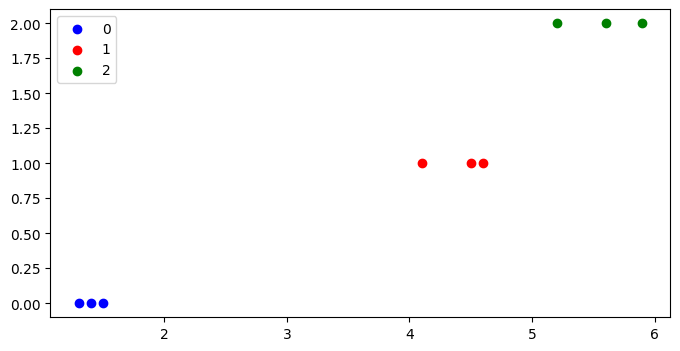

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_3c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()
plt.show()

In [3]:
N = 6
d = 2 # dimensionality
k = 3 # number of classes

# one_hot
def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print(X)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]
 [1.  5.2]
 [1.  5.6]
 [1.  5.9]]


In [4]:
# initialize parameters
theta = 0.01 * np.random.randn(d, k)
print('theta:\n', theta)

theta:
 [[ 0.01251033 -0.00830147 -0.01007994]
 [-0.01270166 -0.00607086  0.00349916]]


In [5]:
# some parameters
learning_rate = 0.01
losses = []
num_iter = 2000

for epoch in range(num_iter):
    # evaluate class scores
    z = X.dot(theta)    

    #compute the class probabilities
    exp_z = np.exp(z)    
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # compute the gradient on scores
    dz = y_hat - y_one_hot

    # backpropate the gradient to the parameters (W,b)
    dtheta = X.T.dot(dz)

    # perform a parameter update
    theta = theta - learning_rate*dtheta

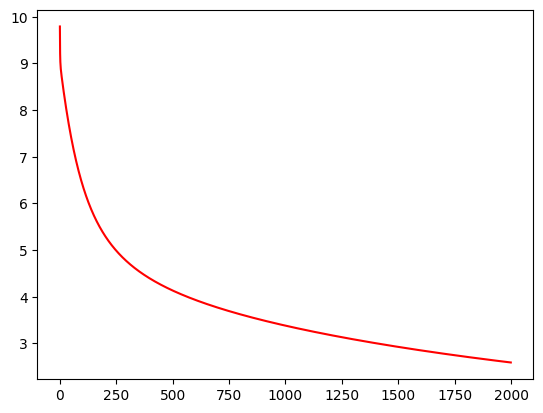

In [6]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [7]:
z = X.dot(theta)    
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[9.35343860e-01 6.41118870e-02 5.44252540e-04]
 [9.46748668e-01 5.28604105e-02 3.90921359e-04]
 [9.21687027e-01 7.75572078e-02 7.55765577e-04]
 [1.54535851e-02 6.11238744e-01 3.73307671e-01]
 [4.07508432e-02 7.09630872e-01 2.49618285e-01]
 [1.19618791e-02 5.80834583e-01 4.07203538e-01]
 [2.30511074e-03 3.83154068e-01 6.14540822e-01]
 [6.99341385e-04 2.64032021e-01 7.35268638e-01]
 [2.74591080e-04 1.91808606e-01 8.07916803e-01]]


In [8]:
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1 2 2 2]
